#imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando dados
fifa_df = pd.read_csv('../completo.csv')
missing = fifa_df.isnull().sum()
missing

ID                                 0
name                               0
full_name                          0
club                             253
club_logo                        253
special                            0
age                                0
league                           253
birth_date                         0
height_cm                          0
weight_kg                          0
body_type                          0
real_face                          0
flag                               0
nationality                        0
photo                              0
eur_value                          0
eur_wage                           0
eur_release_clause              1494
overall                            0
potential                          0
pac                                0
sho                                0
pas                                0
dri                                0
def                                0
phy                                0
i

In [3]:
# Tirando todos os espaços em branco antes e depois das palavras
fifa_df = fifa_df.applymap(lambda x: x.strip() if type(x) is str else x)

## 2.0 Separando variáveis categóricas das variáveis numéricas

In [4]:
numerical_variables = ['eur_value', 'eur_wage', 'eur_release_clause','age', 'height_cm', 'weight_kg', 'ID', 'special', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']
categorical_variables = [v for v in fifa_df.columns if v not in numerical_variables]

## 3.0 Tratando variáveis Categóricas

In [5]:
fifa_df[categorical_variables].astype(str).describe()

,name,full_name,club,club_logo,league,birth_date,body_type,real_face,flag,nationality,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
count,17994,17994,17994,17994,17994,17994,17994,17994,17994,17994,...,17994,17994,17994,17994,17994,17994,17994,17994,17994,17994
unique,17022,17891,648,648,42,6010,9,2,164,164,...,2,2,2,1,1,1,1,1,1,2
top,J. Rodríguez,Scott Brown,nan,nan,Argentinian Superliga,1992-02-29,Normal,False,https://cdn.sofifa.org/flags/14@3x.png,England,...,False,False,False,False,False,False,False,False,False,False
freq,7,3,253,253,780,225,10587,16772,1631,1631,...,14354,15931,17796,17994,17994,17994,17994,17994,17994,15973


In [6]:
# Amostra do dataset
fifa_df[categorical_variables].head()

,name,full_name,club,club_logo,league,birth_date,body_type,real_face,flag,nationality,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,Spanish Primera División,1985-02-05,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,...,False,False,False,False,False,False,False,False,False,False
1,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,Spanish Primera División,1987-06-24,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,...,False,False,False,False,False,False,False,False,False,False
2,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,French Ligue 1,1992-02-05,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,...,False,False,False,False,False,False,False,False,False,False
3,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,Spanish Primera División,1987-01-24,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,...,False,False,False,False,False,False,False,False,False,False
4,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,German Bundesliga,1986-03-27,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,...,False,False,False,False,False,False,False,False,False,True


In [7]:
fifa_df[categorical_variables].isnull().sum()

name                                0
full_name                           0
club                              253
club_logo                         253
league                            253
birth_date                          0
body_type                           0
real_face                           0
flag                                0
nationality                         0
photo                               0
work_rate_att                       0
work_rate_def                       0
preferred_foot                      0
1_on_1_rush_trait                   0
acrobatic_clearance_trait           0
argues_with_officials_trait         0
avoids_using_weaker_foot_trait      0
backs_into_player_trait             0
bicycle_kicks_trait                 0
cautious_with_crosses_trait         0
chip_shot_trait                     0
chipped_penalty_trait               0
comes_for_crosses_trait             0
corner_specialist_trait             0
diver_trait                         0
dives_into_t

In [8]:
## Jogadores que não possuem Clube, Logo do Clube ou Liga. Deletar.
fifa_df = fifa_df[~fifa_df['club'].isna() & fifa_df['club_logo'].isna() & fifa_df['league'].isna()]
fifa_df[categorical_variables].isnull().sum()

name                              0
full_name                         0
club                              0
club_logo                         0
league                            0
birth_date                        0
body_type                         0
real_face                         0
flag                              0
nationality                       0
photo                             0
work_rate_att                     0
work_rate_def                     0
preferred_foot                    0
1_on_1_rush_trait                 0
acrobatic_clearance_trait         0
argues_with_officials_trait       0
avoids_using_weaker_foot_trait    0
backs_into_player_trait           0
bicycle_kicks_trait               0
cautious_with_crosses_trait       0
chip_shot_trait                   0
chipped_penalty_trait             0
comes_for_crosses_trait           0
corner_specialist_trait           0
diver_trait                       0
dives_into_tackles_trait          0
diving_header_trait         

## Variáveis Numéricas

In [9]:
fifa_df[numerical_variables].isnull().sum()

eur_value                   0
eur_wage                    0
eur_release_clause          0
age                         0
height_cm                   0
weight_kg                   0
ID                          0
special                     0
overall                     0
potential                   0
pac                         0
sho                         0
pas                         0
dri                         0
def                         0
phy                         0
international_reputation    0
skill_moves                 0
weak_foot                   0
crossing                    0
finishing                   0
heading_accuracy            0
short_passing               0
volleys                     0
dribbling                   0
curve                       0
free_kick_accuracy          0
long_passing                0
ball_control                0
acceleration                0
                           ..
gk_kicking                  0
gk_positioning              0
gk_reflexe

# 4.2 Normalizando os dados

In [10]:
fifa_df[numerical_variables].head()

,eur_value,eur_wage,eur_release_clause,age,height_cm,weight_kg,ID,special,overall,potential,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fifa_df[numerical_variables] = scaler.fit_transform(fifa_df[numerical_variables])
fifa_df[numerical_variables].head()

ValueError: Found array with 0 sample(s) (shape=(0, 80)) while a minimum of 1 is required by MinMaxScaler.

# 5. Codificando colunas categóricas

5.1 Codificando colunas simples

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import string

def remove_special_chars(x, exceptions = ['|']):
    x = x.replace(' ', '').lower()
    for char in string.punctuation:
        if char not in exceptions:
            x = x.replace(char, '')
    return x
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
fifa_df[categorical_variables].head()

,name,full_name,club,club_logo,league,birth_date,body_type,real_face,flag,nationality,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk


Club, name, full name, club_logo

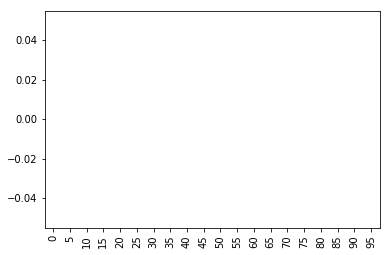

In [20]:
all_clubs = fifa_df.club
acc_frequency = all_clubs.value_counts().cumsum() / len(all_clubs) * 100
x = [i for i in range(0,100, 5)]
y = [len(acc_frequency[acc_frequency < i]) for i in x]
frequencies = pd.Series(index=x, data=y)
frequencies.plot(kind='bar')

In [21]:
##Eliminando os clubs menos frequentes - serão utilizados os que tem frequencia acumulada somada, em ordem, ate !!!!!!!!VERIFICAR
selected_clubs = list(acc_frequency[acc_frequency < 70].index)
len(selected_clubs), len(set(fifa_df.club))

(0, 0)

In [22]:
# substituindo os diretores irrelevantes por um diretor padrão
fifa_df.club = fifa_df.club.apply(lambda x: x if x in selected_clubs else 'other')

In [24]:
variables = ['name', 'full name']
fifa_df = pd.get_dummies(fifa_df, columns=variables)
#movies_df.drop(columns=variables, inplace=True)
fifa_df.head()

KeyError: "['full name'] not in index"